In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statistics import mode
from sklearn.metrics import confusion_matrix, auc, f1_score, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
df = pd.read_csv("train.csv")
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
new_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [6]:
new_df.shape

(891, 6)

In [7]:
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [8]:
y = df['Survived']

In [10]:
new_df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [11]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
    else:
        return age

In [12]:
new_df['Age'] = new_df[['Age', 'Pclass']].apply(fill_age, axis = 1)

In [13]:
dummie_x = pd.get_dummies(new_df, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [14]:
dummie_x.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
sc = StandardScaler()
dummie_x[['Age']] = sc.fit_transform(dummie_x[['Age']])

In [16]:
dummie_x.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.550185,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.661499,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.247264,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.434308,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.434308,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [17]:
dummie_x.isnull().sum()

Age           0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [88]:
x_train, x_test, y_train, y_test = train_test_split(dummie_x, y, random_state = 0, test_size = 0.2)

In [19]:
x_train.shape

(712, 23)

In [20]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

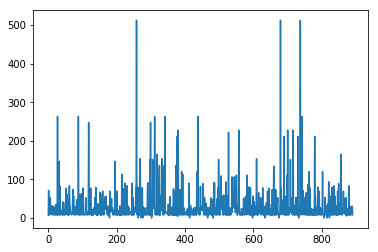

In [21]:
plt.plot(df['Fare'])

0.8188202247191011
0.7669172932330827
[[97 13]
 [18 51]]
(179, 2)


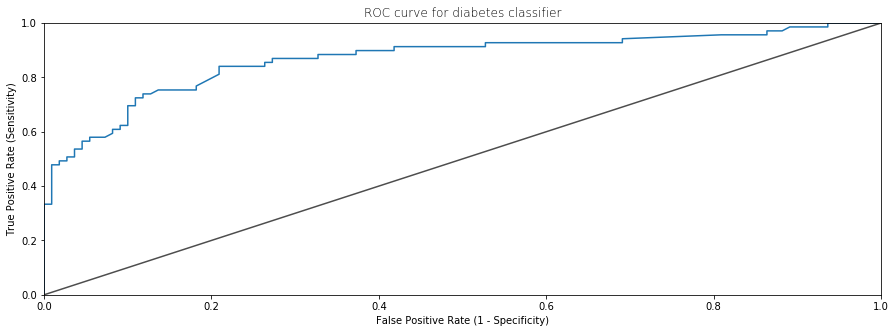

0.8685770750988141


In [89]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print lr_model.score(x_train, y_train)
print f1_score(y_test, y_pred)
print confusion_matrix(y_test, y_pred)
y_pred_prob = lr_model.predict_proba(x_test)

print y_pred_prob.shape
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_score = auc(fpr, tpr)
print auc_score



0.9269662921348315
0.736842105263158
[[95 15]
 [20 49]]
(179, 2)


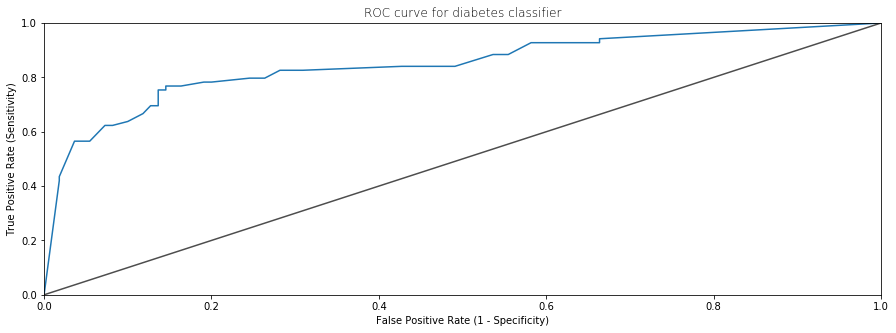

0.8467061923583663


In [159]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print rf_model.score(x_train, y_train)
print f1_score(y_test, y_pred)
print confusion_matrix(y_test, y_pred)
y_pred_prob = rf_model.predict_proba(x_test)

print y_pred_prob.shape
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_score = auc(fpr, tpr)
print auc_score


[[99 11]
 [18 51]]


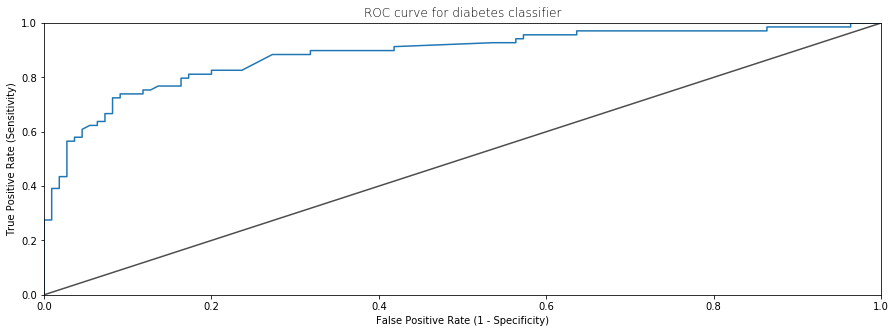

0.8846508563899869


In [48]:
#max voting algo
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()

dt.fit(x_train, y_train)
kn.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
kn_pred = kn.predict(x_test)
lr_pred = lr_model.predict(x_test)

dt_pred_proba = dt.predict_proba(x_test)
kn_pred_proba = kn.predict_proba(x_test)
lr_pred_proba = lr_model.predict_proba(x_test)

final_pred = np.array([])
for i in range(len(x_test)):
    final_pred = np.append(final_pred, mode([dt_pred[i], kn_pred[i], lr_pred[i]]))

final_prob = (dt_pred_proba*0.3 + kn_pred_proba * 0.3 + lr_pred_proba * 0.4)

print confusion_matrix(y_test, final_pred)

fpr, tpr, thresholds = roc_curve(y_test, final_prob[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_score = auc(fpr, tpr)
print auc_score



In [49]:
#stacking
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.array([])
    train_pred=np.array([])
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    print "ok"
    test_pred=model.predict(test)
    print test_pred.shape
    print test.shape
    return [test_pred.reshape(-1,1),train_pred]

In [50]:
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

ok
(179,)
(179, 23)


In [51]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

ok
(179,)
(179, 23)


In [53]:
model3 = LogisticRegression()
test_pred3, train_pred3 = Stacking(model=model3, n_fold=10, train=x_train, test=x_test, y = y_train)

train_pred3 = pd.DataFrame(train_pred3)
test_pred3 = pd.DataFrame(test_pred3)

ok
(179,)
(179, 23)


In [64]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
print model.score(df_test, y_test)
final_pred =model.predict(df_test)
print f1_score(y_test, final_pred)
print classification_report(y_test, final_pred)
final_pred_prob = model.predict_proba(df_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, final_pred_prob)
auc_score = auc(fpr, tpr)
print auc_score
print confusion_matrix(y_test, final_pred)

0.8212290502793296
0.7333333333333333
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       110
           1       0.86      0.64      0.73        69

   micro avg       0.82      0.82      0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.83      0.82      0.81       179

0.8301054018445322
[[103   7]
 [ 25  44]]


In [65]:
def train_predict(model, x, y, test):
    model.fit(x, y)
    train_pred = model.predict(x)
    test_pred = model.predict(test)
    return train_pred, test_pred

In [68]:
dt_train_pred, dt_test_pred = train_predict(model1, x_train, y_train, x_test)
dt_train_pred=pd.DataFrame(dt_train_pred)
dt_test_pred=pd.DataFrame(dt_test_pred)

kn_train_pred, kn_test_pred = train_predict(model2, x_train, y_train, x_test)
kn_train_pred=pd.DataFrame(kn_train_pred)
kn_test_pred=pd.DataFrame(kn_test_pred)

lr_train_pred, lr_test_pred = train_predict(model3, x_train, y_train, x_test)
lr_train_pred=pd.DataFrame(lr_train_pred)
lr_test_pred=pd.DataFrame(lr_test_pred)

In [74]:
df_train = pd.concat([dt_train_pred, kn_train_pred, lr_train_pred], axis = 1)
df_test = pd.concat([dt_test_pred, kn_test_pred, lr_test_pred], axis=1)

In [83]:
new_model = LogisticRegression()
new_model.fit(df_train, y_train)
new_y_pred = new_model.predict(df_test)
print f1_score(y_test, new_y_pred)

print confusion_matrix(y_test, new_y_pred)


0.7424242424242424
[[96 14]
 [20 49]]


In [77]:
df_test.shape

(179, 3)

In [78]:
y_test.shape

(179,)

In [79]:
df_train.shape

(712, 3)

In [80]:
y_train.shape

(712,)

In [109]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(learning_rate=1.0)
ada_model.fit(x_train, y_train)
y_pred = ada_model.predict(x_test)
print y_pred
print confusion_matrix(y_test, y_pred)
print f1_score(y_test, y_pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[95 15]
 [16 53]]
0.7737226277372262


In [121]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
print f1_score(y_test, model.predict(x_test))
print confusion_matrix(model.predict(x_test), y_test)

0.7304347826086955
[[106  27]
 [  4  42]]


In [164]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print model.score(x_test, y_test)
print y_pred
print confusion_matrix(y_test, y_pred)
print f1_score(y_test, y_pred)

0.8435754189944135
[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[102   8]
 [ 20  49]]
0.7777777777777778


In [163]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.1}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(len(x_test)):
    if y_pred[i]>=0.5: 
        y_pred[i]=1
    else: 
        y_pred[i]=0
print f1_score(y_test, y_pred)
print confusion_matrix(y_test, y_pred)

0.7812499999999999
[[101   9]
 [ 19  50]]


In [144]:
y_pred

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.])

0.7812499999999999

In [161]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
print gbm.score(x_test, y_test)
predictions = gbm.predict(x_test)

0.8324022346368715


In [158]:
f1_score(y_test, predictions)

0.7761194029850746

In [160]:
from imblearn.ensemble import BalancedRandomForestClassifier 


model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print f1_score(y_test, y_pred)
print confusion_matrix(y_test, y_pred)

ImportError: No module named imblearn.ensemble

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier 

                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train, y_train)

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

NameError: name 'x_tarin' is not defined